In [47]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#upload csv file
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [49]:
# read the csv file
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [50]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [51]:
df.shape

(299, 13)

In [52]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [54]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [55]:
# declare features and target
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [56]:
c0 = df[df.DEATH_EVENT==0]
c1 = df[df.DEATH_EVENT==1]
print(f'count of data with label 0: {len(c0)}\ncount of data with label 1: {len(c1)}')

count of data with label 0: 203
count of data with label 1: 96


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

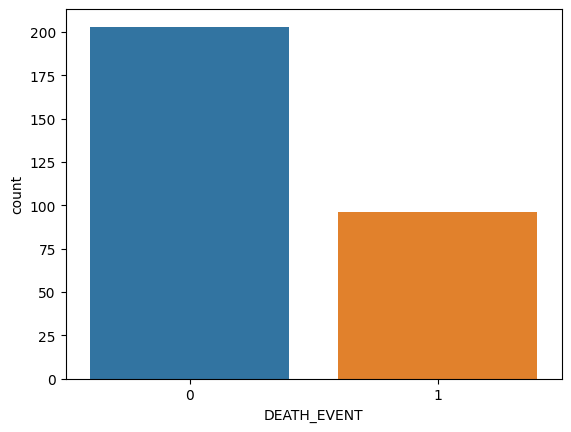

In [58]:
# see proportion of labels
sns.countplot(x='DEATH_EVENT', data=df)

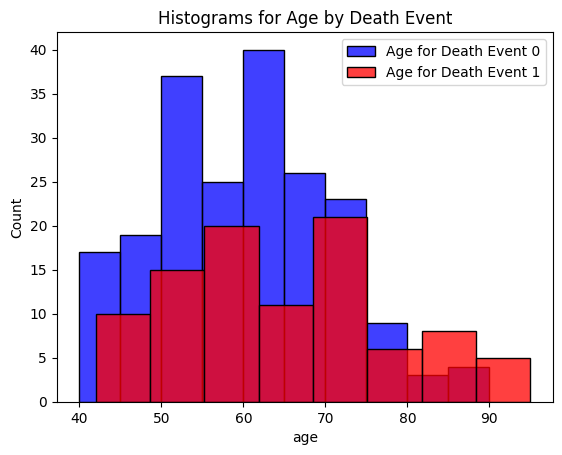

In [59]:
# plot comparison age by death event
sns.histplot(c0.age,kde=False,color="blue", label="Age for Death Event 0")
sns.histplot(c1.age,kde=False,color = "red", label = "Age for Death Event 1")
plt.title("Histograms for Age by Death Event")
plt.legend()

Text(0.5, 1.0, 'Correlation Heatmap')

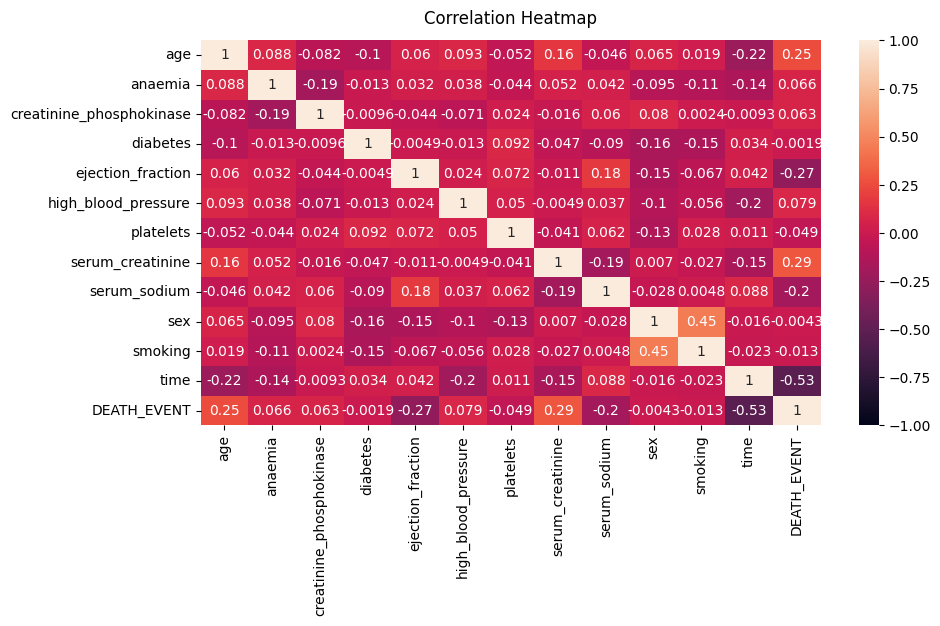

In [60]:
#corelation heat map
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [61]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [62]:
print(f'data train: {len(X_train)}')
print(f'data test: {len(y_test)}')

data train: 224
data test: 75


In [63]:
# declare model random forest with best parameter from hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,
                            criterion='entropy',
                            max_features=0.5,
                            min_samples_leaf=10,
                            random_state=11,
                            n_jobs=1)

In [64]:
# fit data train into model
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=10, n_jobs=1, random_state=11)

In [65]:
# do prediction
rf_pred = rf.predict(X_test)

In [66]:
# print accuracy score
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.8933333333333333

In [67]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.85      0.85      0.85        26

    accuracy                           0.89        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.89      0.89        75



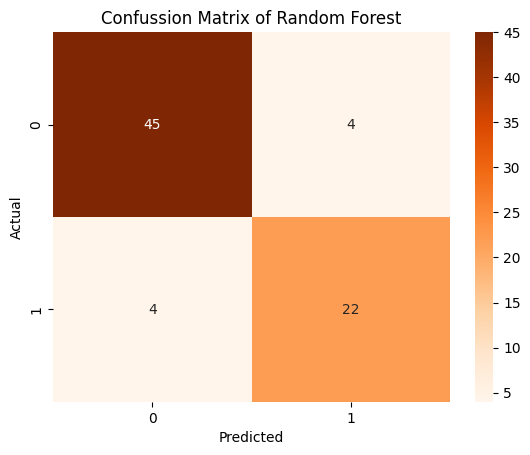

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, rf_pred)

ax = sns.heatmap(cm, annot=True, cmap="Oranges")

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confussion Matrix of Random Forest')
plt.show()